<a href="https://colab.research.google.com/github/001ckk/RNN-and-Naive-Bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting if an email is either spam or not using Naive Bayes**

#**Defining the Question**

**1. Specifying the question**

Perform a classification of emails to determine if the email belongs to spam or not.

**2. Defining the metric of success**

1. Download the dataset.

2. Randomly partition each dataset into two parts i.e 80 - 20 sets.

3. For the datasets, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform the Naive Bayes Classifier.

4. Compute the accuracy (percentage of correct classification)

5. Report the confusion matrix of each classifier.

6. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

7. Suggest and apply at least one of the optimization techniques that you learned earlier this week.

8. Provide further recommendations to improve classifier

**3. Understanding the context**

Perform classification of the testing set samples using the Naive Bayes Classifier

**4. Recording the Experimental Design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis recording your observations.

6. Perform Naive Bayes classification.

7. Challenge your solution

**5. Data Relevance**

The data and the key can be found on the following [link](https://archive.ics.uci.edu/ml/datasets/Spambase)

#**Data loading and cleaning**

In [ ]:
import pandas as pd
import numpy as np 

In [26]:
# Importing the data

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**Data Cleaning**

In [27]:
# Checking the data 

data.info()

# From this, we can see that there 58 columns and 4600 rows
# Data is in the form of float and integer
# There are no null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [28]:
data.describe()

# This shows the mathematical description of the data.

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [29]:
# Checking null values

data.isnull().sum()

# There are no null entries 

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [30]:
# Checking and removing duplicate values

print(data.duplicated().sum())
data.drop_duplicates(inplace = True)
print(data.duplicated().sum())

391
0


In [31]:
# Checking outliers 

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[((data < (q3 + 1.5*iqr))|(data > (q1 - 1.5*iqr)))]
outliers.count()

# Since we do not know what this information is about, we will not be dropping any values.

0          982
0.64       810
0.64.1    4209
0.1         46
0.32      4209
0.2        933
0.3        762
0.4        767
0.5        722
0.6       4209
0.7        651
0.64.2    4209
0.8        806
0.9        336
0.10       305
0.32.1    4209
0.11       906
1.29       971
1.93      4209
0.12       389
0.96      4209
0.13       112
0.14       619
0.15       659
0.16      4209
0.17       789
0.18       667
0.19       452
0.20       359
0.21       456
0.22       279
0.23       196
0.24       397
0.25       206
0.26       470
0.27       582
0.28       809
0.29        78
0.30       378
0.31       422
0.32.2     143
0.33       335
0.34       353
0.35       317
0.36      4209
0.37       500
0.38        60
0.39       201
0.40       750
0.41      4209
0.42       505
0.778     4209
0.43      4209
0.44       702
3.756     4209
61        4209
278       4209
1         4209
dtype: int64

#**Exploratory Data Analysis**

**Univariate Analysis**

In [32]:
data.describe()

# This shows the mathematical description of the data. 

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


**Bivariate Analysis**

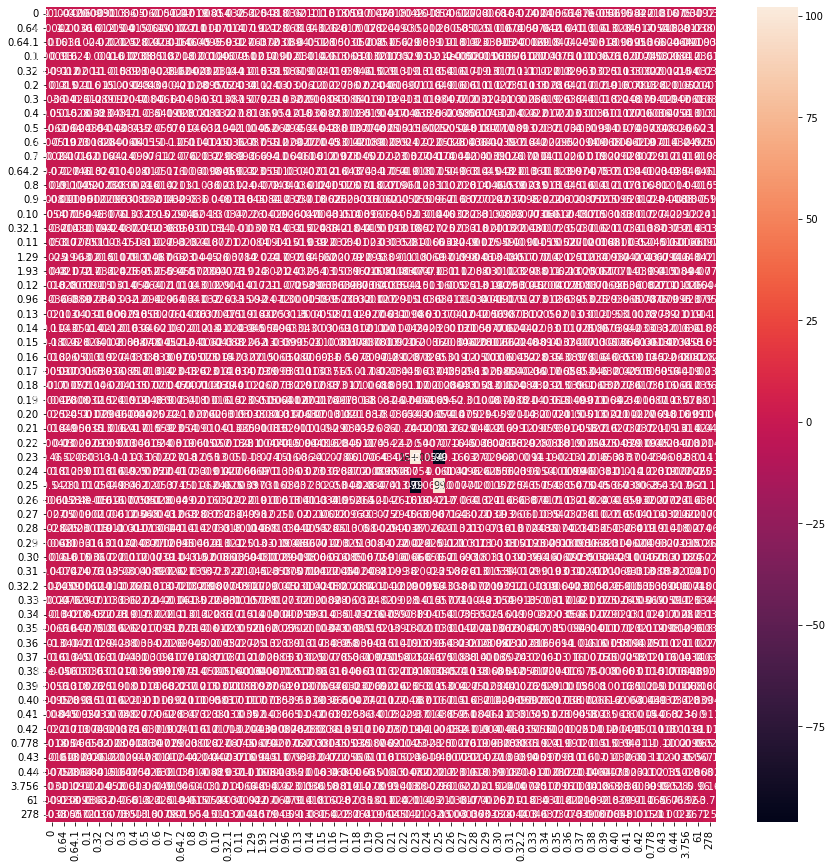

In [37]:
# VFA

import seaborn as sns
import matplotlib.pyplot as plt

vif_matrix = data.drop('1', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(vif_matrix), index=vif_matrix.index, columns=vif_matrix.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()


In [ ]:
# Heatmap

#**Naive Bayes**

**test_size = 0.2**

In [39]:
# choosing the variables.

x = data.drop('1', axis = 1)
y = data['1']

In [40]:
# choosing the test size

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [42]:
# training the model

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(x_train, y_train)

In [43]:
# predicting our test predictors

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

0.8147268408551069


In [45]:
# Getting the confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

# The model is 81% accurate

[[350 145]
 [ 11 336]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       495
           1       0.70      0.97      0.81       347

    accuracy                           0.81       842
   macro avg       0.83      0.84      0.81       842
weighted avg       0.86      0.81      0.82       842



**test_size = 0.3**

In [47]:
# choosing the test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0 )

# training the model

clf = GaussianNB()  
model = clf.fit(x_train, y_train)

# predicting our test predictors

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

0.8250197941409343


In [48]:
# Getting the confusion matrix 

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

# The model is 83% accurate

[[536 201]
 [ 20 506]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       737
           1       0.72      0.96      0.82       526

    accuracy                           0.83      1263
   macro avg       0.84      0.84      0.82      1263
weighted avg       0.86      0.83      0.83      1263



**test_size = 0.4**

In [49]:
# choosing the test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0 )

# training the model

clf = GaussianNB()  
model = clf.fit(x_train, y_train)

# predicting our test predictors

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

0.830166270783848


In [50]:
# Getting the confusion matrix 

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

# The model is 83% accurate

[[735 259]
 [ 27 663]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       994
           1       0.72      0.96      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



**Multinomial Naive Bayes Classifier**

In [ ]:
# Splitting the data 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [51]:
# fitting the model

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train)

In [52]:
# model evaluation 

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

0.7707838479809976


In [53]:
# Getting the confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[735 259]
 [ 27 663]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       994
           1       0.72      0.96      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



With a test_size of 0.2 and using the multinomial Naive Bayes classifier we get a less accuracy score of 77.1% as compared to 81.5%

#**Conclusion**

The better classifier would be the Gaussian Naive Bayes Classifier.

It has a higher accuracy score for all the test_sizes.

#**Follow up Questions**

**a). Did we have the right data?**

**b). Do we need other data to answer our question?** 

**c). Did we have the right question?** 